In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Wczytaj dane z pliku CSV
clean_file_path = './data/diabetes_prediction_dataset_clean.csv'
original_file_path = './data/diabetes_prediction_dataset.csv'

data = pd.read_csv(clean_file_path)
original_data = pd.read_csv(original_file_path)

FileNotFoundError: [Errno 2] No such file or directory: './data/diabetes_prediction_dataset_clean.csv'

<h1 style='color: gold'>
    Różnice w datasetach
</h1>

In [35]:
# Różnica między danymi oryginalnymi a danymi po wyczyszczeniu

print(f'Usunięto {len(original_data) - len(data)} wierszy z {len(original_data)} i zostało {len(data)}.')

clean_columns = set(data.columns)
original_columns = set(original_data.columns)

extra_columns = clean_columns - original_columns
missing_columns = original_columns - clean_columns

print("\nDodatkowe kolumny po wyczyszczeniu:", extra_columns)
print("Brakujące kolumny po wyczyszczeniu:", missing_columns)

Usunięto 36756 wierszy z 100000 i zostało 63244.

Dodatkowe kolumny po wyczyszczeniu: {'smoking_current', 'gender_Female', 'smoking_ever', 'smoking_not current', 'smoking_former', 'gender_Male', 'smoking_never'}
Brakujące kolumny po wyczyszczeniu: {'gender', 'smoking_history'}


<h1 style='color: gold'>
    Podstawowe dane
</h1>

In [56]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,63244.000000,63244.000000,63244.000000,63244.000000,63244.000000,63244.000000,63244.000000
mean,46.563959,0.099140,0.047688,28.440987,5.566786,139.690627,0.111267
std,19.530870,0.298852,0.213108,6.561718,1.096521,42.236591,0.314466
min,0.000000,0.000000,0.000000,10.080000,3.500000,80.000000,0.000000
25%,31.000000,0.000000,0.000000,24.520000,4.800000,100.000000,0.000000
50%,47.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,61.000000,0.000000,0.000000,31.200000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,91.820000,9.000000,300.000000,1.000000


<h1 style='color: gold'>
    Histogramy
</h1>

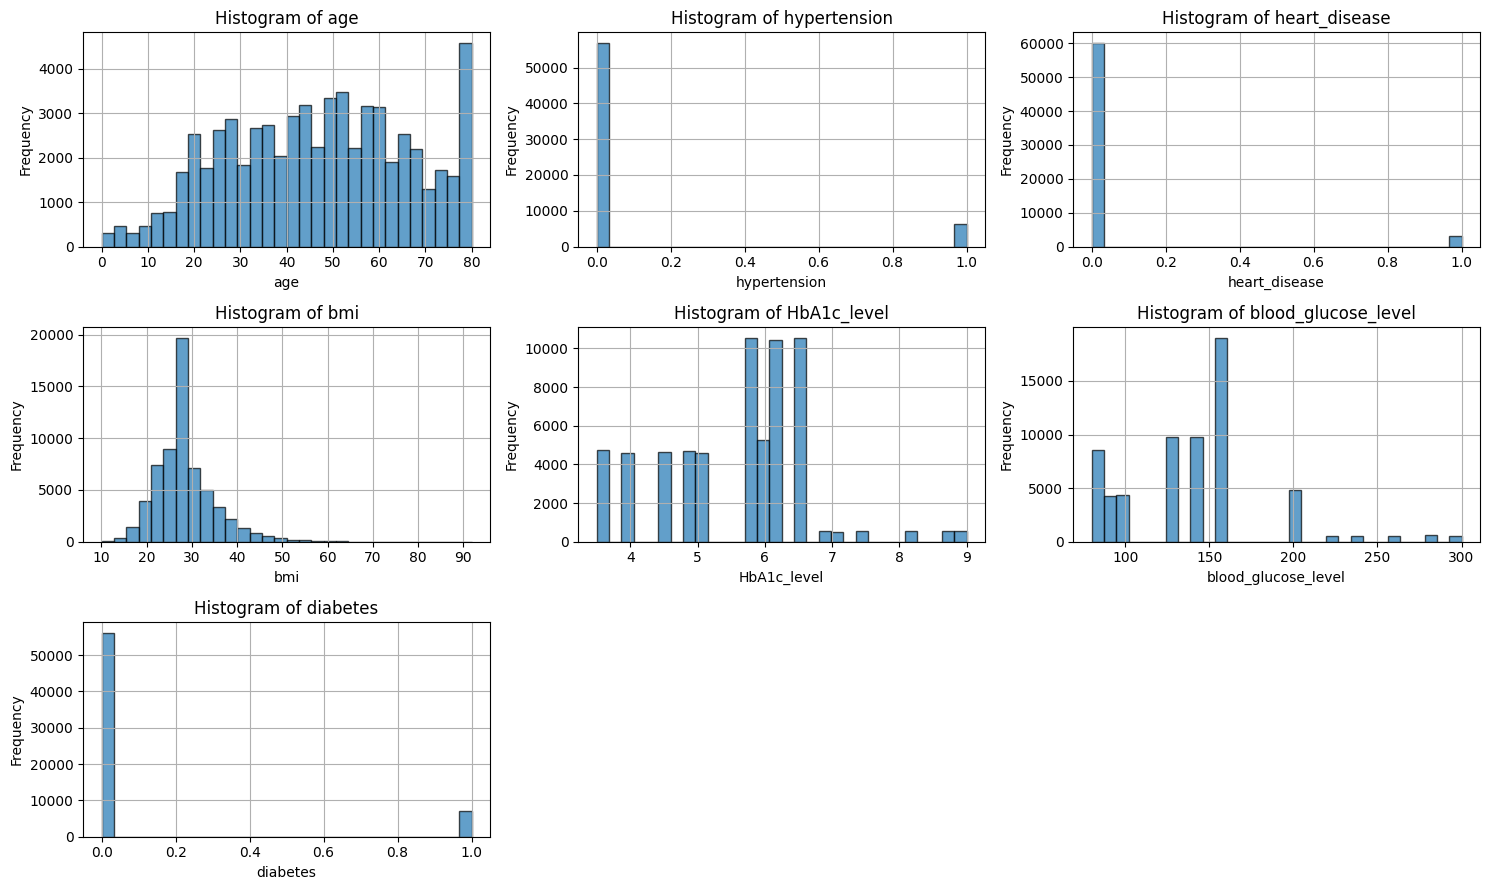

In [37]:
# Lista kolumn numerycznych
numeric_columns = data.select_dtypes(include=['number']).columns

# Liczby rzędów i kolumn dla siatki wykresów
n_cols = 3                                                  # Liczba kolumn w siatce
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols      # Liczba rzędów w siatce

# Tworzenie siatki wykresów
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows))

# Generowanie histogramów dla każdej kolumny numerycznej
for i, column in enumerate(numeric_columns):
    ax = axs[i // n_cols, i % n_cols]
    ax.hist(data[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Usunięcie pustych wykresów, jeśli istnieją
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()

<h1 style='color: gold'>
    Histogramy dla cech one-hot
</h1>

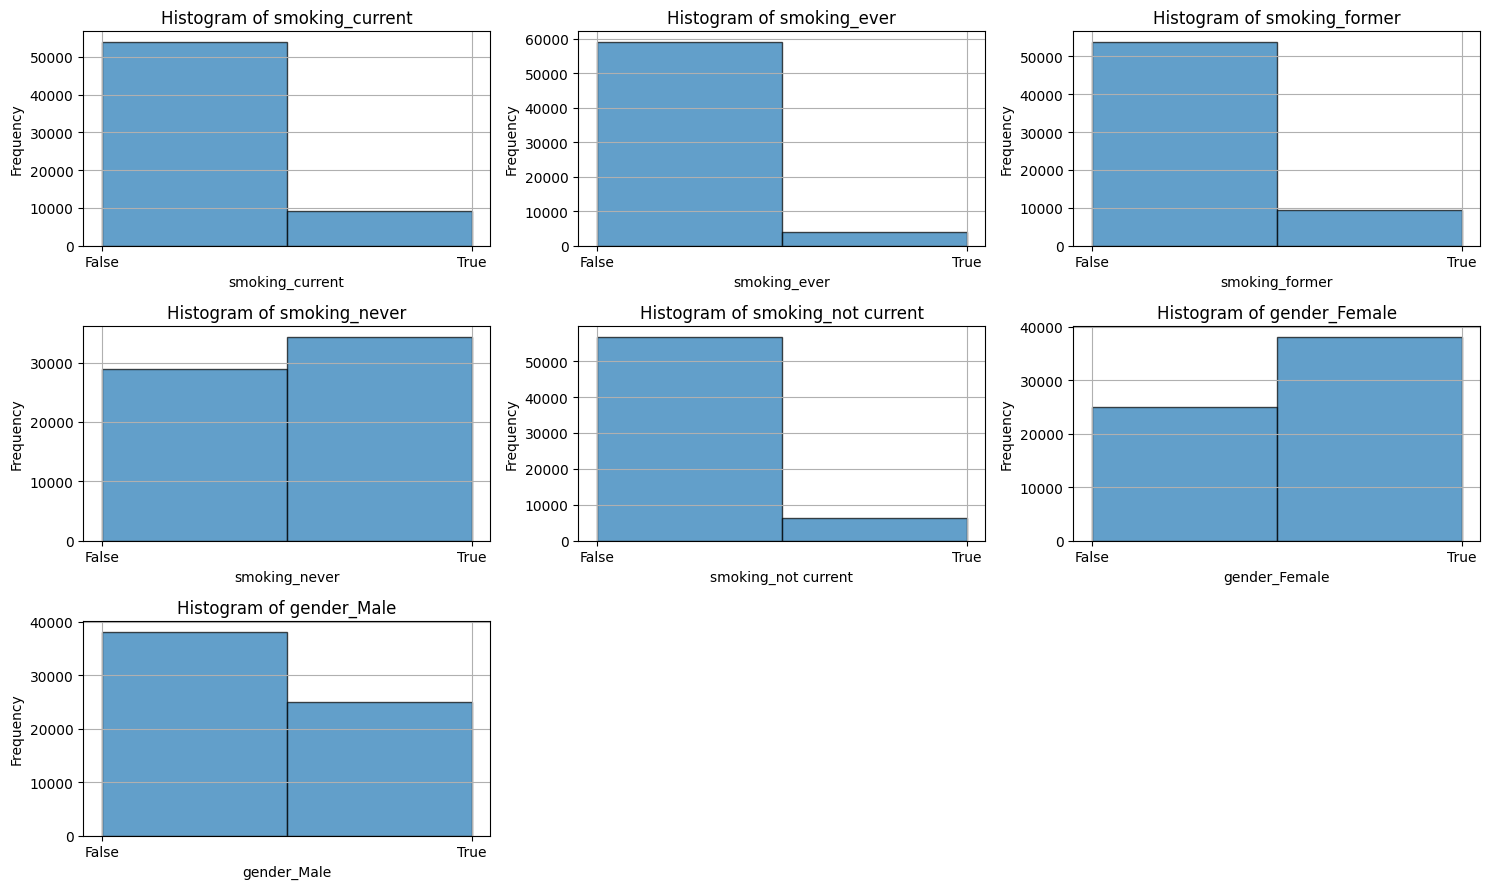

In [38]:
data_numeric = data.select_dtypes(include=['bool']).astype(int)

n_cols = 3
n_rows = (len(data_numeric.columns) + n_cols - 1) // n_cols

# Tworzenie siatki wykresów
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows))

# Generowanie histogramów dla każdej kolumny boolowskiej
for i, column in enumerate(data_numeric.columns):
    ax = axs[i // n_cols, i % n_cols]
    ax.hist(data_numeric[column], bins=2, edgecolor='k', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['False', 'True'])
    ax.grid(True)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()

<h1 style='color: gold'>
    Macierz korelacji
</h1>

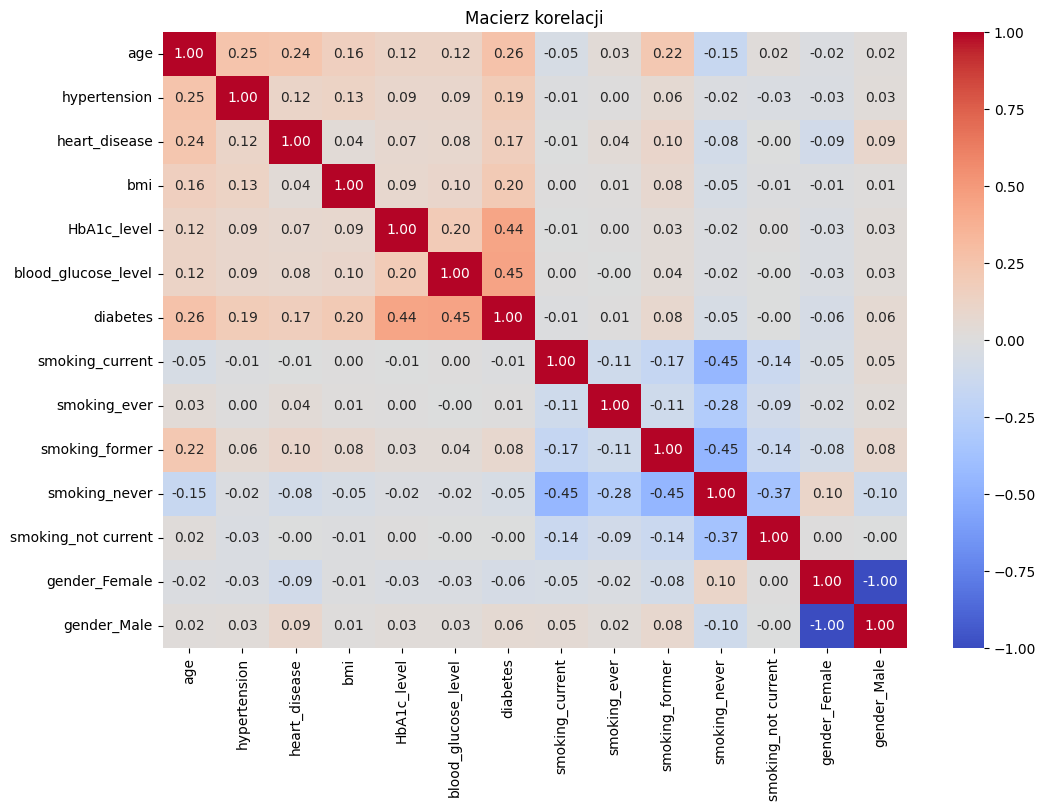

In [28]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

<h1 style='color: gold'>
    Analiza dwóch cech
</h1>

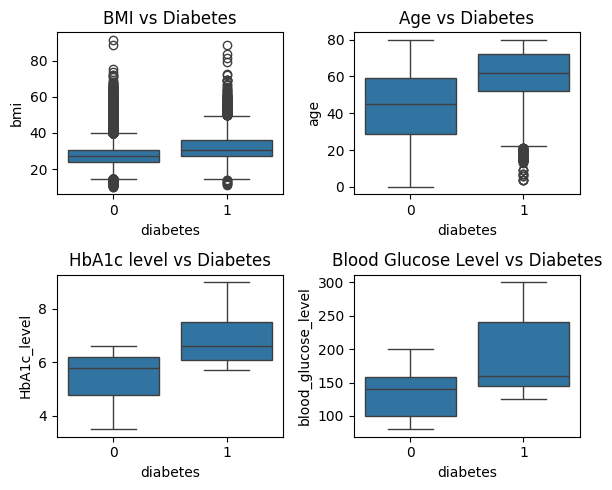

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(6, 5))

sns.boxplot(x='diabetes', y='bmi', data=data, ax=axs[0, 0])
axs[0, 0].set_title('BMI vs Diabetes')

sns.boxplot(x='diabetes', y='age', data=data, ax=axs[0, 1])
axs[0, 1].set_title('Age vs Diabetes')

sns.boxplot(x='diabetes', y='HbA1c_level', data=data, ax=axs[1, 0])
axs[1, 0].set_title('HbA1c level vs Diabetes')

sns.boxplot(x='diabetes', y='blood_glucose_level', data=data, ax=axs[1, 1])
axs[1, 1].set_title('Blood Glucose Level vs Diabetes')

plt.tight_layout()
plt.show()


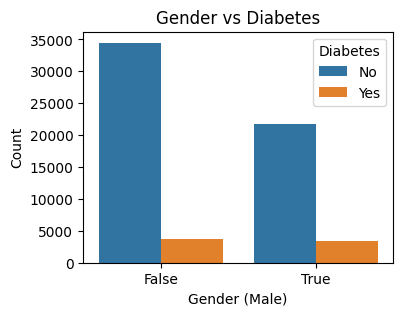

In [46]:
plt.figure(figsize=(4, 3))

sns.countplot(x='gender_Male', hue='diabetes', data=data)

plt.title('Gender vs Diabetes')
plt.xlabel('Gender (Male)')
plt.ylabel('Count')

plt.legend(title='Diabetes', labels=['No', 'Yes'])

plt.show()

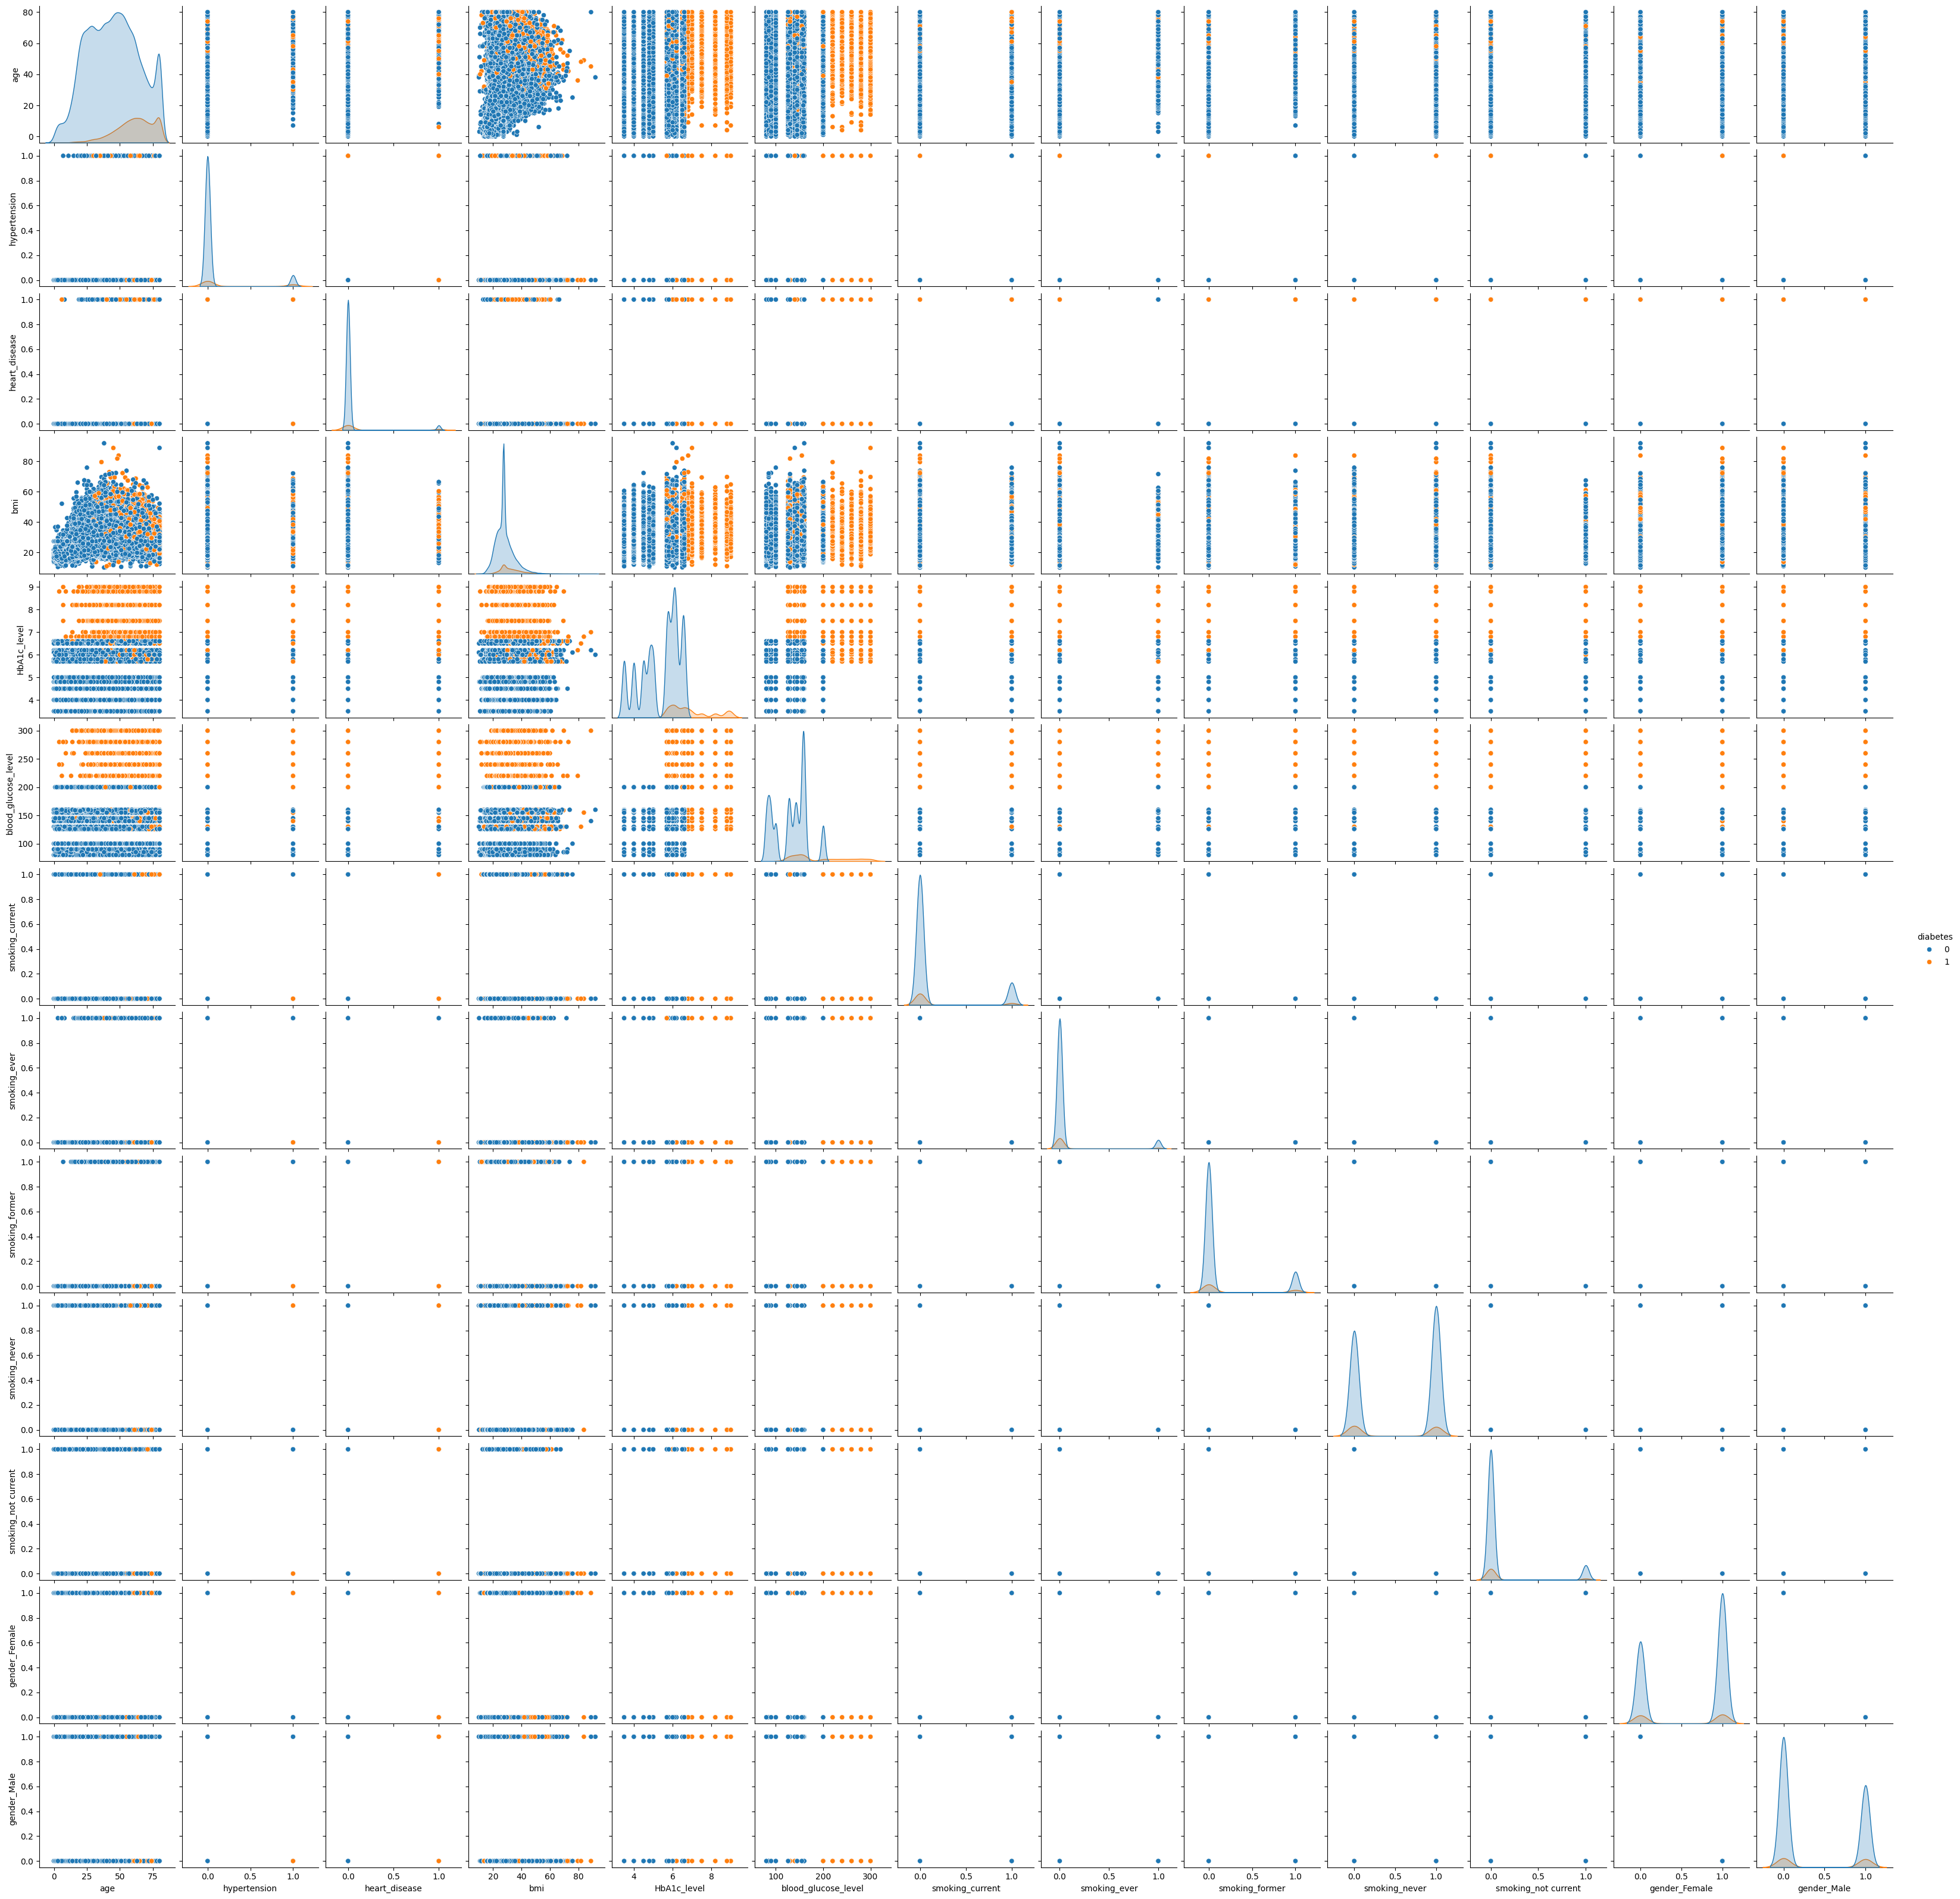

In [53]:
sns.pairplot(data, hue='diabetes')
plt.show()